In [48]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from tqdm import tqdm

# Modelling the Timbre of Musical Instruments
Final project for Physics 113, by Alice Ku and Daniel Sun.

In [58]:
SAMPLERATE = 44100
SCALE = np.iinfo(np.int16).max

def export(data, filename):
    # Normalize data
    data_norm = data / np.max(np.abs(data)) * SCALE
    scipy.io.wavfile.write(filename + ".wav", SAMPLERATE, data_norm.astype(np.int16))

In [79]:
def omega_n(n, f_0, B = 0.001):
    return 2 * np.pi * n * f_0 * np.sqrt(1 + B * n**2) / np.sqrt(1 + B)

In [80]:
def G(t, x_0, f_0 = 440, L = 1, B = 1e-3, N = 100, dx = 1e-3, dt = 1e-3):
    x_arr = np.arange(0, L, dx)
    t_arr = np.arange(0, t, dt)
    X, T = np.meshgrid(x_arr, t_arr)
    rv = np.zeros_like(X)
    for n in tqdm(range(1, N + 1)):
        omega = omega_n(n, f_0, B = B)
        rv += 2 / (omega * L) * np.sin(omega * T) * np.sin(n * np.pi / L * X) * np.sin(n * np.pi / L * x_0)
    return rv

In [81]:
def w(t, x_0, f_0 = 440, L = 1, B = 1e-3, N = 100, dt = 1 / SAMPLERATE):
    t_arr = np.arange(0, t, dt)
    rv = np.zeros_like(t_arr)
    for n in tqdm(range(1, N + 1)):
        omega = omega_n(n, f_0, B = B)
        rv += 2 / omega * np.sin(omega * t_arr) * np.sin(n * np.pi / L * x_0)
    return rv

100%|██████████| 100/100 [00:00<00:00, 714.26it/s]


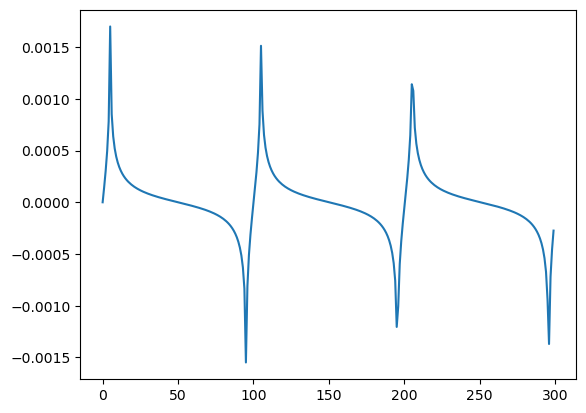

In [87]:
data = w(2, 0.1, B = 0)
export(data, "test")
plt.plot(data[0:300])